In [4]:
!pip install seaborn wordcloud
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re # We use regular expressions for data cleaning
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_colwidth', None)

from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import jaccard_score
from nltk.metrics import edit_distance
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="tensorflow")

# Analyse exploratoire des données


Dans cette section, nous plongeons dans l'ensemble de données Quora pour obtenir des informations précieuses et mieux comprendre les caractéristiques de nos données.

La dataset se compose de quatre colonnes : id, question1, question2 et is_duplicated, où is_duplicated indique si les deux questions sont liées ou non.

Notre parcours d'EDA comprendra une série d'analyses, notamment :

**1-Aperçu des données :** Nous commencerons par examiner la structure de base de
l'ensemble de données, en explorant les premières lignes pour avoir une idée des données.

**2-Distribution des données :** Nous examinerons la distribution de la variable cible, is_duplicated, pour comprendre l'équilibre entre les paires de questions dupliquées et non dupliquées.

**3-Analyse de texte :** Nous effectuerons des analyses basées sur le texte sur question1 et question2, explorant les fréquences de mots, les expressions courantes et les motifs éventuels.


À la fin de cette section EDA, nous visons à avoir une compréhension complète de l'ensemble de données Quora, posant ainsi les bases pour les étapes ultérieures de notre analyse et de notre pipeline de modélisation.

**1-Aperçu des données :**

In [10]:
import pandas as pd

# Charger le dataset
Quora = pd.read_csv('train.csv')

# Supprimer les 200 000 premières lignes
Quora = Quora.iloc[354290:]

# Vérifier la nouvelle taille du dataset
print("Nouvelle taille du dataset :", Quora.shape)

Nouvelle taille du dataset : (50000, 6)


In [11]:
print(Quora.isna().sum())
Quora.dropna(inplace=True)
Quora

id              0
qid1            0
qid2            0
question1       1
question2       0
is_duplicate    0
dtype: int64


,id,qid1,qid2,question1,question2,is_duplicate
354290,354290,483400,483401,What is some product or service that you think could easily be improved and how would you improve it?,What is a product you think is marketed well? How would you improve it?,1
354291,354291,9588,3062,Will there be a World War III soon?,How close is a World War III?,1
354292,354292,483402,483403,What are some cultural differences between Canadians and the French?,What are some cultural differences between Canadians and British?,0
354293,354293,65121,307815,What are some reasons why your iPod Touch wont turn on or charge?,Why is my iPod Touch not turning on?,1
354294,354294,53476,55176,What are the negative side effects to musturbating?,What are the negative side effects of masturbation?,1
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket programming language of the latest version?,How many keywords are there in PERL Programming Language in the latest version?,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,"What is the approx annual cost of living while studying in UIC Chicago, for an Indian student?","I am having little hairfall problem but I want to use hair styling product. Which one should I prefer out of gel, wax and clay?",0


La dataset Quora comprend 50 000 lignes et six colonnes, fournissant une source riche d'informations pour les tâches de traitement du langage naturel. Voici une brève description de chaque colonne :

id : Un identifiant unique pour chaque ligne dans l'ensemble de données.

qid1 : L'identifiant pour la première question dans une paire de questions.

qid2 : L'identifiant pour la deuxième question dans une paire de questions.

question1 : Le texte de la première question dans une paire.

question2 : Le texte de la deuxième question dans une paire.

is_duplicate : Un indicateur binaire (0 ou 1) qui indique si les deux questions dans une paire sont considérées comme des duplicatas (1) ou non (0).

Cet énorme ensemble de données est particulièrement utile pour les tâches liées à l'identification de questions dupliquées, ce qui le rend précieux pour explorer les techniques de traitement du langage naturel et les modèles d'apprentissage automatique.

**2-Distribution des données :**

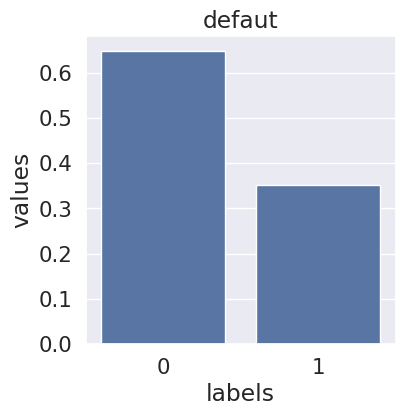

In [ ]:
temp = Quora.is_duplicate.value_counts()
df_class = pd.DataFrame({'labels': temp.index,
                   'values': temp.values/len(Quora)})
plt.figure(figsize = (4,4))
plt.title('defaut')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df_class)
locs, labels = plt.xticks()
plt.show()


Les données sont bien équilibrées, avec un pourcentage de 64% de questions non dupliquées et 36% de questions dupliquées.

**3-Analyse de texte :**

<h5><u>3-1 nuage de mots</u></h5>



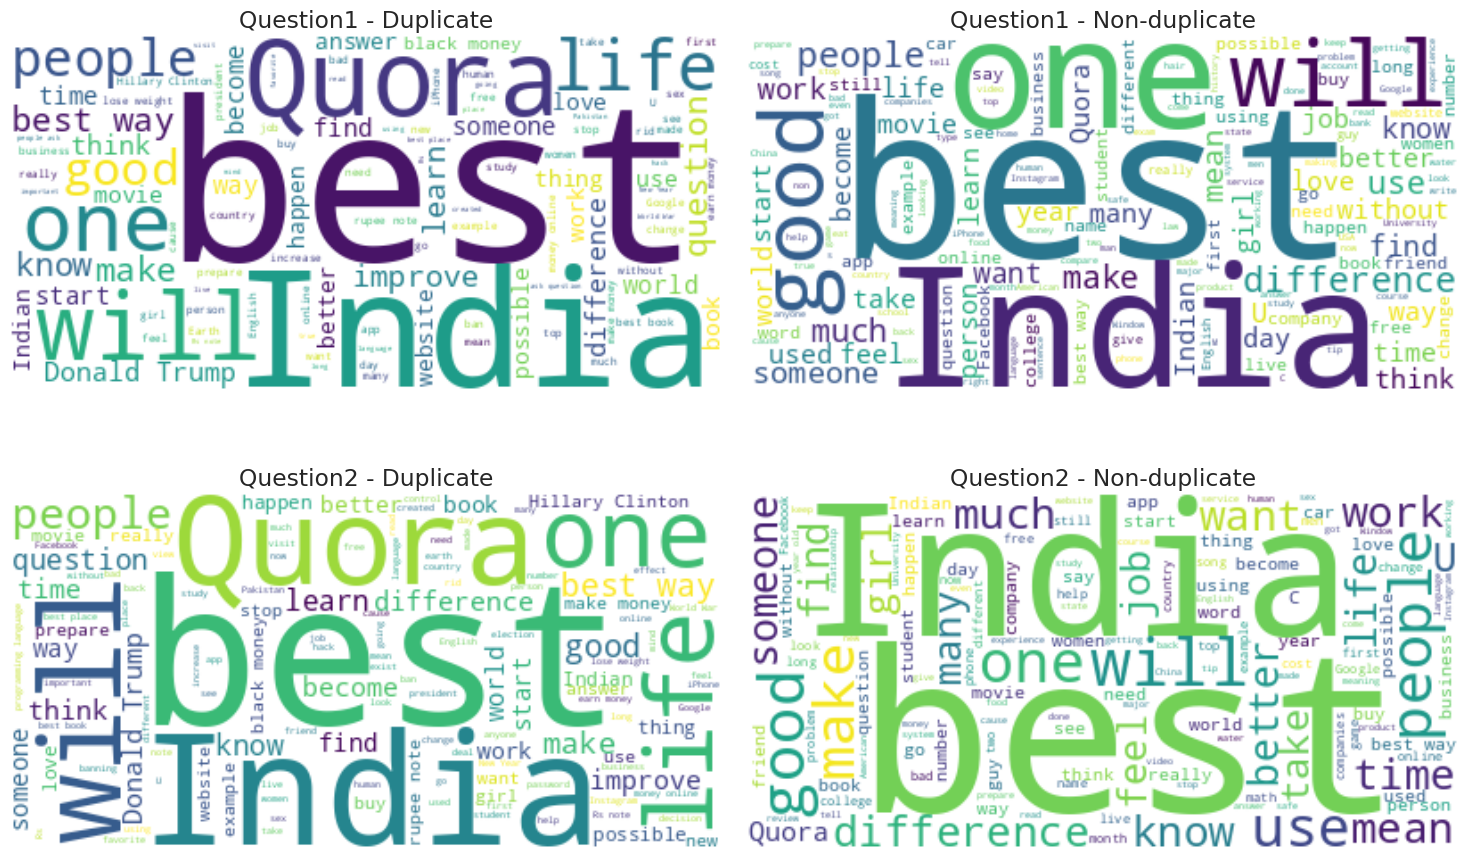

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and plot word clouds
def generate_wordcloud(data_q1_duplicate, data_q1_non_duplicate, data_q2_duplicate, data_q2_non_duplicate):
    # Generate word clouds for question1 and question2
    wordcloud_q1_duplicate = WordCloud(width=400, height=200, background_color='white').generate(' '.join(data_q1_duplicate.astype(str)))
    wordcloud_q1_non_duplicate = WordCloud(width=400, height=200, background_color='white').generate(' '.join(data_q1_non_duplicate.astype(str)))
    wordcloud_q2_duplicate = WordCloud(width=400, height=200, background_color='white').generate(' '.join(data_q2_duplicate.astype(str)))
    wordcloud_q2_non_duplicate = WordCloud(width=400, height=200, background_color='white').generate(' '.join(data_q2_non_duplicate.astype(str)))

    # Plot the Word Clouds in a 2x2 subplot
    plt.figure(figsize=(15, 10))
        # Plot for question1 and is_duplicate = 1
    plt.subplot(2, 2, 1)
    plt.imshow(wordcloud_q1_duplicate, interpolation='bilinear')
    plt.title('Question1 - Duplicate')
    plt.axis('off')

    # Plot for question1 and is_duplicate = 0
    plt.subplot(2, 2, 2)
    plt.imshow(wordcloud_q1_non_duplicate, interpolation='bilinear')
    plt.title('Question1 - Non-duplicate')
    plt.axis('off')
    # Plot for question2 and is_duplicate = 1
    plt.subplot(2, 2, 3)
    plt.imshow(wordcloud_q2_duplicate, interpolation='bilinear')
    plt.title('Question2 - Duplicate')
    plt.axis('off')

    # Plot for question2 and is_duplicate = 0
    plt.subplot(2, 2, 4)
    plt.imshow(wordcloud_q2_non_duplicate, interpolation='bilinear')
    plt.title('Question2 - Non-duplicate')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
duplicate_data_q1 = Quora[Quora['is_duplicate'] == 1]['question1']
non_duplicate_data_q1 = Quora[Quora['is_duplicate'] == 0]['question1']
duplicate_data_q2 = Quora[Quora['is_duplicate'] == 1]['question2']
non_duplicate_data_q2 = Quora[Quora['is_duplicate'] == 0]['question2']

# Generate and plot word clouds for 'question1' and 'question2'
generate_wordcloud(duplicate_data_q1, non_duplicate_data_q1, duplicate_data_q2, non_duplicate_data_q2)

<u>3-2 Distribution de la longueur du texte</u>

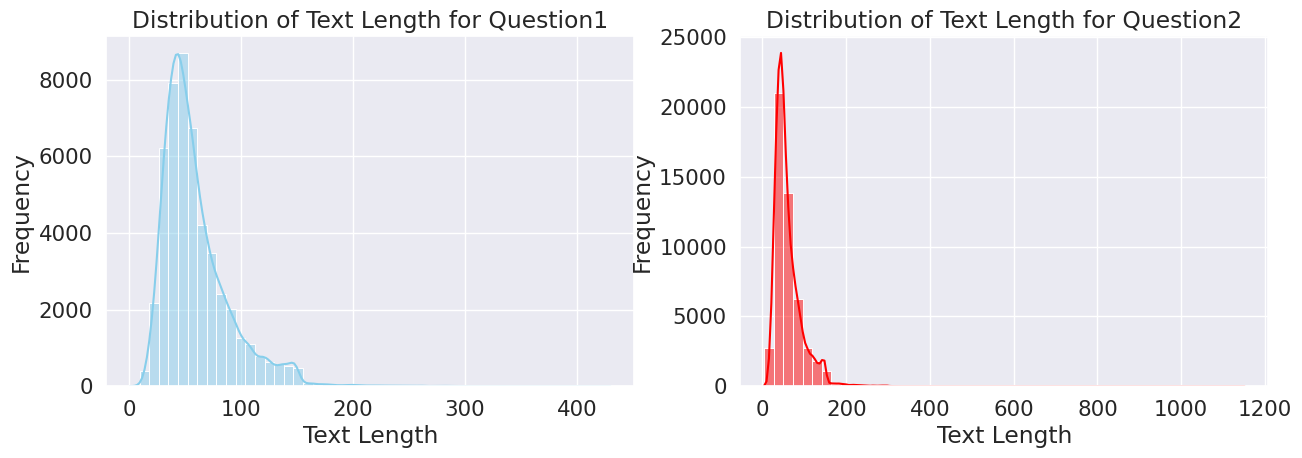

In [ ]:
# Text length distribution for question1
plt.figure(figsize=(15 ,10))
plt.subplot(2,2,1)
sns.histplot(data=Quora, x=Quora['question1'].astype('str').apply(len), bins=50, kde=True, color='skyblue')
plt.title('Distribution of Text Length for Question1')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
# Text length distribution for question2
plt.subplot(2,2,2)
sns.histplot(data=Quora, x=Quora['question2'].astype('str').apply(len), bins=50, kde=True, color='red')
plt.title('Distribution of Text Length for Question2')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


En examinant le plot pour les longueurs de 'question1' et 'question2', une similarité frappante émerge dans la distribution, avec des valeurs allant de 0 à 150 pour 'question1' et de 0 à 180 pour 'question2'. Notamment, les deux tracés présentent un pic distinct dans les deux premiers bacs, indiquant une concentration des questions dans une plage de longueurs relativement plus courtes.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer for bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigrams_q1 = vectorizer.fit_transform(Quora['question1'])

# Get feature names (bigrams)
feature_names = vectorizer.get_feature_names_out()

top_bigrams = pd.DataFrame(bigrams_q1.sum(axis=0).tolist()[0], index=feature_names, columns=['Count'])
top_bigrams_q1 = top_bigrams.sort_values(by='Count', ascending=False).head(20)
bigrams_q2 = vectorizer.fit_transform(Quora['question2'])
feature_names = vectorizer.get_feature_names_out()
top_bigrams = pd.DataFrame(bigrams_q2.sum(axis=0).tolist()[0], index=feature_names, columns=['Count'])
top_bigrams_q2 = top_bigrams.sort_values(by='Count', ascending=False).head(20)

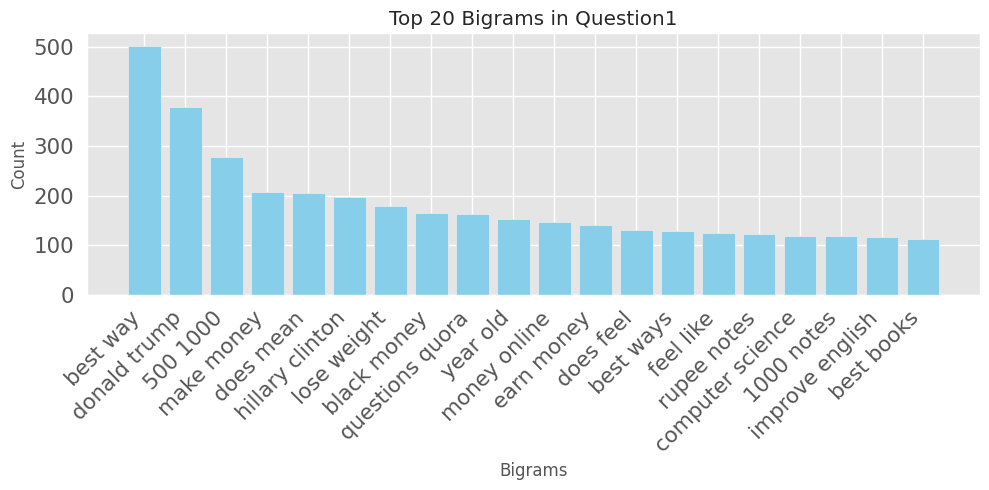

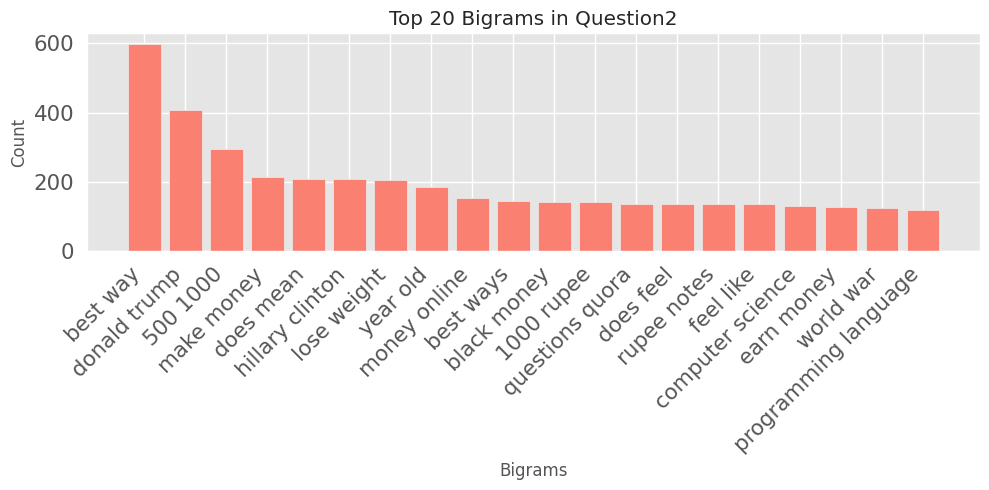

In [ ]:

plt.style.use('ggplot')

# Plot histograms for top bigrams in question1
plt.figure(figsize=(10,5))
plt.bar(top_bigrams_q1.index, top_bigrams_q1['Count'], color='skyblue')
plt.title('Top 20 Bigrams in Question1')
plt.xlabel('Bigrams')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot histograms for top bigrams in question2
plt.figure(figsize=(10,5))
plt.bar(top_bigrams_q2.index, top_bigrams_q2['Count'], color='salmon')
plt.title('Top 20 Bigrams in Question2')
plt.xlabel('Bigrams')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

L'examen des 20 principaux bigrammes des questions 1 et 2 révèle une cohérence remarquable avec une séquence identique des 5 mêmes bigrammes, suggérant une structure linguistique partagée. Les différences subtiles de fréquence entre les bigrammes indiquent des nuances dans l'expression des idées. Certains bigrammes sont plus fréquents, fournissant des informations sur les sujets prédominants. En somme, cette analyse met en lumière la similarité textuelle et les schémas linguistiques récurrents dans l'ensemble de données.

# Approche de Machine Learning  :

<u>Logistic Regression:</u>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# Assuming 'processed_questions' contains preprocessed text
X = Quora[['question1', 'question2']]
y = Quora['is_duplicate']

# Combine 'question1' and 'question2' into a single string for each row
X['combined'] = X['question1'].astype(str) + ' ' + X['question2'].astype(str)

# Handle missing values by filling with an empty string
X['combined'] = X['combined'].fillna('')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X['combined'], y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Ensure the number of samples match
print(X_train_tfidf.shape, '  ', len(X_train))

# Logistic Regression
classifier = LogisticRegression()
classifier.fit(X_train_tfidf, y_train)

# Predictions
predictions = classifier.predict(X_test_tfidf)

# Evaluation
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(confusion_matrix(y_test, predictions))

(39999, 30416)    39999
Accuracy: 0.7398
[[5778  755]
 [1847 1620]]


Le modèle de régression logistique a démontré une précision de 73,98 % sur l'ensemble de test, avec 1620 vrais positifs, 755 faux positifs, 5778 vrais négatifs et 1847 faux négatifs.

En conclusion, ce modèles d'apprentissage automatique  ne parvient pas à détecter une grande partie des questions en double. Malgré une précision d'environ 75,5 %, la matrice de confusion révèle qu'il y a eu des cas de mauvaise classification pour les classes positives et négatives. Pour résoudre ce problème, nous explorons des modèles plus avancés utilisant le deep learning.

In [ ]:
def roc_curve__confusion_matrix(model):
    from sklearn.metrics import roc_curve, auc
    y_prob_test = model.predict_proba(X_test_tfidf)[:, 1]
    y_prob_train  = model.predict_proba(X_train_tfidf)[:, 1]
    prediction=model.predict(X_test_tfidf)
    # calculate tpr ,fpr
    fpr_test , tpr_test , thresholds = roc_curve(y_test, y_prob_test)
    fpr_train , tpr_train , thresholds1 = roc_curve(y_train, y_prob_train)

    # calculate AUC score
    roc_auc_test  = auc(fpr_test, tpr_test)
    roc_auc_train  = auc(fpr_train ,tpr_train)


    # calculate confusion matrix for test set
    confusion_matrix_test = confusion_matrix(y_test, prediction)

    # create subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # plot ROC curves on the first subplot
    axs[0].plot(fpr_train, tpr_train, color='green', label='ROC curve train (AUC = %0.2f)' % roc_auc_train)
    axs[0].plot(fpr_test, tpr_test, color='blue', label='ROC curve test (AUC = %0.2f)' % roc_auc_test)
    axs[0].plot([0, 1], [0, 1], color='red', linestyle='--')
    axs[0].set_xlabel('False Positive Rate')
    axs[0].set_ylabel('True Positive Rate')
    axs[0].set_title('Receiver Operating Characteristic (ROC) Curve')
    axs[0].legend(loc="lower right")

    sns.set(font_scale=1.4)
    sns.heatmap(confusion_matrix_test, annot=True, fmt='g', cmap='Blues', ax=axs[1])
    axs[1].set_xlabel('Predicted label')
    axs[1].set_ylabel('True label')
    axs[1].set_title('Confusion Matrix (Test Set)model');

    plt.tight_layout()
    plt.show()

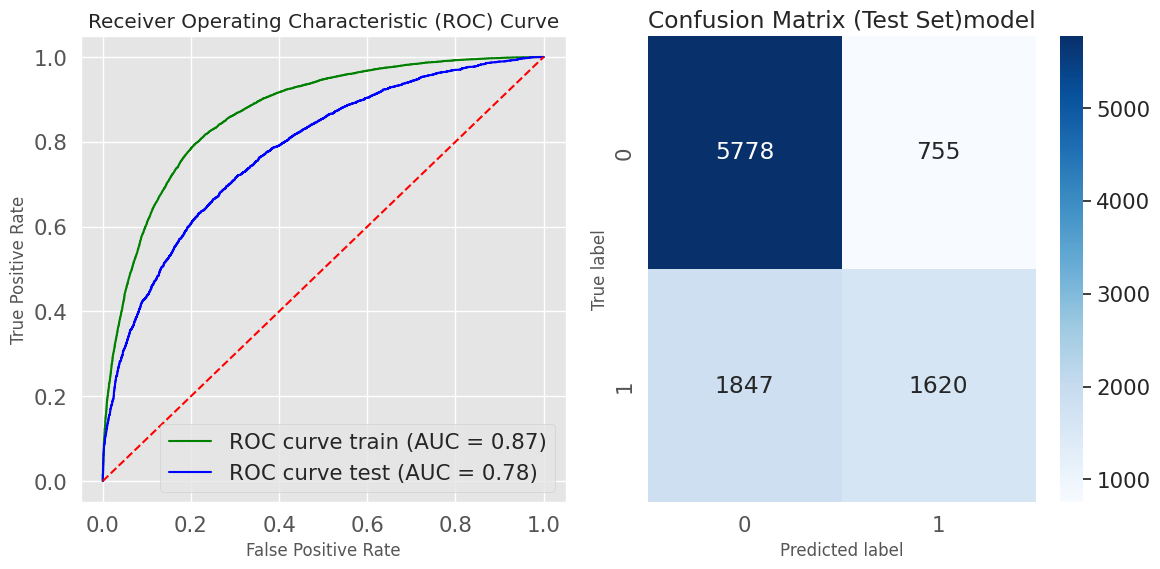

In [ ]:
roc_curve__confusion_matrix(classifier)

# Approche de Deep Learning

<u>Word Embeddings pré-entraînés</u>

In [ ]:
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Assuming 'processed_questions' contains preprocessed text
X = Quora[['question1', 'question2']]
y = Quora['is_duplicate']

# Tokenize the sentences
tokenized_sentences_q1 = X['question1'].apply(lambda x: str(x).split())
tokenized_sentences_q2 = X['question2'].apply(lambda x: str(x).split())

# Train Word2Vec model
word2vec_model_q1 = Word2Vec(sentences=tokenized_sentences_q1, vector_size=100, window=5, min_count=1, workers=4)
word2vec_model_q2 = Word2Vec(sentences=tokenized_sentences_q2, vector_size=100, window=5, min_count=1, workers=4)

# Function to get the vector representation of a sentence
def get_sentence_vector(sentence, model):
    vector = np.zeros(model.vector_size)
    count = 0
    for word in sentence:
        if word in model.wv:
            vector += model.wv[word]
            count += 1
    if count != 0:
        vector /= count
    return vector

# Create feature vectors for each question
X_q1 = np.array([get_sentence_vector(sentence, word2vec_model_q1) for sentence in tokenized_sentences_q1])
X_q2 = np.array([get_sentence_vector(sentence, word2vec_model_q2) for sentence in tokenized_sentences_q2])

# Concatenate the feature vectors
X_combined = np.concatenate((X_q1, X_q2), axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Random Forest without tuning
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Predictions
y_pred = rfc.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7401
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.88      0.82      6533
           1       0.68      0.47      0.56      3467

    accuracy                           0.74     10000
   macro avg       0.72      0.68      0.69     10000
weighted avg       0.73      0.74      0.73     10000



Le modèle Random Forest utilisant des embeddings Word2Vec pré-entraînés a obtenu une précision globale d'environ 74,01%. Voici une description détaillée des performances du modèle pour chaque classe :

Classe 0 (Questions non dupliquées) :
Précision : 76%
Rappel : 88%
Score F1 : 82%
Classe 1 (Questions dupliquées) :
Précision : 68%
Rappel : 47%
Score F1 : 56%
Le score F1 moyen macro est d'environ 74%, ce qui indique une performance globalement équilibrée entre les deux classes. Le modèle semble être meilleur pour identifier les questions non dupliquées, avec une précision et un rappel plus élevés, tandis qu'il a plus de difficultés à bien classifier les questions dupliquées, particulièrement en termes de rappel.

Bien que le modèle fonctionne bien dans l'identification des questions non dupliquées , il pourrait bénéficier d'une amélioration de sa capacité à détecter avec précision les instances dupliquées. Ceci peut être réalisé en utilisant d'autres approches de Deep Learning.

<u>Les réseaux siamois</u>

Les réseaux siamois sont une architecture de réseau neuronal spécialisée conçue pour comparer et capturer les relations entre des paires de données d'entrée. Nous démontrons comment implémenter un réseau siamois pour l'analyse de similarité de texte, nous permettant de mesurer la proximité entre les deux questions d'entrée.

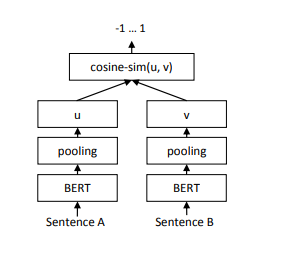

In [ ]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Lambda, Dense
from keras import backend as K
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Assuming 'question1' and 'question2' are your input questions
# and 'is_duplicate' is the binary label indicating whether the questions are duplicates or not.
questions1 = Quora['question1']
questions2 = Quora['question2']
labels = Quora['is_duplicate']

# Assuming questions1, questions2, and labels are your input data
# Fill missing values with empty strings
questions1 = questions1.fillna('')
questions2 = questions2.fillna('')

# Tokenize your questions if needed
max_sequence_length = 80
embedding_dim = 300
questions = Quora['question1'].astype(str) + ' ' + Quora['question2'].astype(str)

tokens = [word for sentence in questions for word in sentence.split()]

# Compute the vocabulary size
vocabulary_size = len(set(tokens))
questions = (questions1 + ' ' + questions2).astype(str)
tokenizer = Tokenizer(num_words=vocabulary_size)
tokenizer.fit_on_texts(questions)



In [ ]:
sequences1 = tokenizer.texts_to_sequences(questions1)
sequences2 = tokenizer.texts_to_sequences(questions2)
padded_sequences1 = pad_sequences(sequences1, maxlen=max_sequence_length)
padded_sequences2 = pad_sequences(sequences2, maxlen=max_sequence_length)

input_layer1 = Input(shape=(max_sequence_length,))
input_layer2 = Input(shape=(max_sequence_length,))

embedding_layer = Embedding(input_dim=vocabulary_size, output_dim=embedding_dim)

lstm_layer = LSTM(units=50)

x1 = embedding_layer(input_layer1)
x1 = lstm_layer(x1)

x2 = embedding_layer(input_layer2)
x2 = lstm_layer(x2)

distance_layer =  Lambda(lambda x: tf.keras.backend.abs(x[0] - x[1]),
                               output_shape=lambda _: (1,))([x1, x2])

output_layer = Dense(units=1, activation='sigmoid')(distance_layer)

siamese_model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)

siamese_model.compile(optimizer=Adam(0.0001), loss='binary_crossentropy', metrics=['accuracy'])
callbacks = [
    EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True),
    ModelCheckpoint(filepath='siamese_model_weights.h5', save_best_only=True)
]

siamese_model.fit([padded_sequences1, padded_sequences2], labels, epochs=5, batch_size=32, validation_split=0.2, callbacks=callbacks)

Epoch 1/5
1250/1250 [==============================] - 950s 757ms/step - loss: 0.6377 - accuracy: 0.6284 - val_loss: 0.6080 - val_accuracy: 0.6585
Epoch 2/5
1250/1250 [==============================] - 950s 760ms/step - loss: 0.5876 - accuracy: 0.6452 - val_loss: 0.5844 - val_accuracy: 0.6585
Epoch 3/5
1250/1250 [==============================] - 917s 734ms/step - loss: 0.5301 - accuracy: 0.6494 - val_loss: 0.5762 - val_accuracy: 0.6720
Epoch 4/5
1250/1250 [==============================] - 929s 743ms/step - loss: 0.4695 - accuracy: 0.7524 - val_loss: 0.5598 - val_accuracy: 0.7174
Epoch 5/5
1250/1250 [==============================] - 904s 723ms/step - loss: 0.4115 - accuracy: 0.8109 - val_loss: 0.5698 - val_accuracy: 0.7155


La formation du modèle LSTM siamois révèle une progression de la précision sur cinq époques. Avec une précision initiale de 62,84 %, le modèle s'améliore considérablement pour atteindre une précision remarquable de 81,09 % à la dernière époque. Cette tendance souligne la capacité du modèle à discerner les relations sémantiques dans les paires de textes , validant la robustesse de l'architecture LSTM siamoise dans la capture de modèles nuancés dans les données textuelles. Les valeurs de perte décroissantes confirment la capacité du modèle à optimiser ses capacités prédictives tout au long du processus d'apprentissage. Ces résultats confirment l'efficacité du modèle LSTM siamois dans la prédiction de similarité textuelle.

# Exploitation des modèles préformés (BERT) :

In [13]:
!pip install pytorch-transformers
!pip install pytorch-pretrained-bert pytorch-nlp

import logging
logging.basicConfig(level=logging.INFO)
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pytorch_pretrained_bert import BertTokenizer, BertConfig
from pytorch_pretrained_bert import BertAdam, BertForSequenceClassification
from tqdm import tqdm, trange
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt


In [14]:
# Randomly sample 5000 data points
Quora = Quora.sample(n=5000)

print("The percentage of non similar question pairs after sampling is : ")
print(len(Quora[Quora['is_duplicate']==0].index)*100/len(Quora.index))
print("The percentage of similar question pairs after sampling is : ")
print(len(Quora[Quora['is_duplicate']==1].index)*100/len(Quora.index))

# store the labels
labels = Quora.is_duplicate.values

The percentage of non similar question pairs after sampling is : 
64.1
The percentage of similar question pairs after sampling is : 
35.9


In [15]:
# Load pre-trained model tokenizer (vocabulary)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# function to tokenize and generate input ids for the tokens
# returns a list of input ids

def prep_data(ques1, ques2):
  all_input_ids = []

  for (q1,q2) in zip(ques1, ques2):

    # first sentence is appended with [CLS] and [SEP] in the beginning and end
    q1 = '[CLS] ' + q1 + ' [SEP] '
    tokens = tokenizer.tokenize(q1)

    # 0 denotes first sentence
    seg_ids = [0] * len(tokens)

    # second sentence is appended with [SEP] in the end
    q2 = q2 + ' [SEP] '
    tok_q2 = tokenizer.tokenize(q2)

    # seg ids is appended with 1 to denote second sentence
    seg_ids += [1] * len(tok_q2)

    # first and second sentence tokens are appended together
    tokens += tok_q2

    # input ids are generated for the tokens (one question pair)
    input_ids = tokenizer.convert_tokens_to_ids(tokens)

    # input ids are stored in a separate list
    all_input_ids.append(input_ids)

  return all_input_ids


all_input_ids = prep_data(Quora['question1'].values, Quora['question2'].values)

100%|██████████| 231508/231508 [00:00<00:00, 262144.14B/s]


In [16]:
# set MAX_LEN as one of 128, 256, 320, 384, 512
MAX_LEN = 128

# Pad our input tokens
pad_input_ids = pad_sequences(all_input_ids,
                          maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

In [17]:
# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in pad_input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)

In [18]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


Creation du model BERT

In [19]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model.cuda()

100%|██████████| 407873900/407873900 [00:37<00:00, 10833872.97B/s]


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): BertLayerNorm()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): BertLayerNorm()
              (dropout): Dropout(p=0.1, inplace=Fa

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

'Tesla T4'

In [21]:
# Use train_test_split to split our data into train and validation sets for training

train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(pad_input_ids, labels,
                                                            random_state=2018, test_size=0.2)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, pad_input_ids,
                                             random_state=2018, test_size=0.2)

In [22]:
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [23]:
# Select a batch size for training. For fine-tuning BERT on a specific task, the authors recommend a batch size of 16 or 32
batch_size = 32

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop,
# with an iterator the entire dataset does not need to be loaded into memory

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)


Obtiens les mêmes hyperparamètres que le modèle et définis l'optimiseur Adam

In [24]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

In [25]:
# This variable contains all of the hyperparemeter information our training loop needs
optimizer = BertAdam(optimizer_grouped_parameters,
                     lr=2e-5,
                     warmup=.1)

In [26]:
# Function to calculate the accuracy of our predictions vs labels
def accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

1-Obtenir le lot de données pour calculer le gradient à partir du chargeur de données que nous avons créé précédemment.
2-Ne pas stocker les gradients car ils ne sont pas nécessaires dans ce cas.
3-Effectuer une passe avant dans le réseau suivie d'une passe arrière (rétropropagation).
4-Mettre à jour les paramètres du réseau.
5-Suivre la fonction de perte.
6-Effectuer des prédictions sur l'ensemble de validation et enregistrer la précision.
7-Exécuter les étapes 1 à 6 pour les deux époques spécifié.

In [28]:
train_loss_set = []

# Number of training epochs (authors recommend between 2 and 4)
epochs = 2

# trange is a tqdm wrapper around the normal python range
for _ in trange(epochs, desc="Epoch"):


  # Training

  # Set our model to training mode (as opposed to evaluation mode)
  model.train()

  # Tracking variables
  tr_loss = 0
  nb_tr_examples, nb_tr_steps = 0, 0

  # Train the data for one epoch
  for step, batch in enumerate(train_dataloader):

    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)

    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch

    # Clear out the gradients (by default they accumulate)
    optimizer.zero_grad()

    # Forward pass
    loss = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
    train_loss_set.append(loss.item())

    # Backward pass
    loss.backward()

    # Update parameters and take a step using the computed gradient
    optimizer.step()


    # Update tracking variables
    tr_loss += loss.item()
    nb_tr_examples += b_input_ids.size(0)
    nb_tr_steps += 1

  print("Train loss: {}".format(tr_loss/nb_tr_steps))


  # Validation

  # Put model in evaluation mode to evaluate loss on the validation set
  model.eval()

  # Tracking variables
  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0

  # Evaluate data for one epoch
  for batch in validation_dataloader:

    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)

    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch

    # Telling the model not to compute or store gradients, saving memory and speeding up validation
    with torch.no_grad():

      # Forward pass, calculate logit predictions
      logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    tmp_eval_accuracy = accuracy(logits, label_ids)

    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1

  print(" Accuracy: {}".format(eval_accuracy/nb_eval_steps))

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Train loss: 0.4256154537200928


Epoch:  50%|█████     | 1/2 [01:44<01:44, 104.19s/it]

 Accuracy: 0.810546875
Train loss: 0.26644838374853136


Epoch: 100%|██████████| 2/2 [03:29<00:00, 104.68s/it]

 Accuracy: 0.8203125


Ce resultat est genial : l'accuracy vaut 0.82 en seulement 2 epoques

En conclusion, le notebook explore deux architectures distinctes, Siamese BERT et Siamese LSTM, pour la tâche de similarité de texte. Le modèle Siamese BERT exploite des embeddings pré-entraînés basés sur des transformeurs pour capturer les relations sémantiques complexes au sein de paires de textes.

D'autre part, le modèle Siamese LSTM utilise des réseaux de neurones à mémoire à court et long terme (LSTM) pour capturer les dépendances séquentielles dans le texte. L'historique d'entraînement montre une amélioration constante.

Comparativement, les deux modèles présentent des performances louables, avec Siamese BERT affichant une précision légèrement supérieure.